### Load Datasets

In [98]:
import pandas as pd
import numpy as np

rng = np.random.default_rng(17010868)
#rng = rng.integers(1,1000000)

# === Load Datasets ===
# File paths
num_file = "/Users/kangkyeongmo/Desktop/School/2024_Fall/DS-GA_1001_001/Group_Project/Capstone/rmpCapstoneNum.csv"

# Define column names
num_columns = [
    "Average Rating", "Average Difficulty", "Number of Ratings",
    "Received a 'pepper'?", "Proportion Would Retake",
    "Online Ratings Count", "Male", "Female"
]

df_num = pd.read_csv(num_file, header=None, names=num_columns)

df_num.head()

,Average Rating,Average Difficulty,Number of Ratings,Received a 'pepper'?,Proportion Would Retake,Online Ratings Count,Male,Female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


In [77]:
tags_file = "/Users/kangkyeongmo/Desktop/School/2024_Fall/DS-GA_1001_001/Group_Project/Capstone/rmpCapstoneTags.csv"

tags_columns = [
    "Tough Grader", "Good Feedback", "Respected", "Lots to Read",
    "Participation Matters", "Don’t Skip Class", "Lots of Homework",
    "Inspirational", "Pop Quizzes", "Accessible", "So Many Papers",
    "Clear Grading", "Hilarious", "Test Heavy", "Graded by Few Things",
    "Amazing Lectures", "Caring", "Extra Credit", "Group Projects",
    "Lecture Heavy"
]
df_tags = pd.read_csv(tags_file, header=None, names=tags_columns)

df_tags.head()


,Tough Grader,Good Feedback,Respected,Lots to Read,Participation Matters,Don’t Skip Class,Lots of Homework,Inspirational,Pop Quizzes,Accessible,So Many Papers,Clear Grading,Hilarious,Test Heavy,Graded by Few Things,Amazing Lectures,Caring,Extra Credit,Group Projects,Lecture Heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
qual_file = "/Users/kangkyeongmo/Desktop/School/2024_Fall/DS-GA_1001_001/Group_Project/Capstone/rmpCapstoneQual.csv"

qual_columns = ["Major/Field", "University", "State"]

df_qual = pd.read_csv(qual_file, header=None, names=qual_columns)

df_qual.head


<bound method NDFrame.head of             Major/Field                   University State
0      Criminal Justice      George Mason University    VA
1                   NaN                          NaN   NaN
2               English     Alabama State University    AL
3               English       University of Kentucky    KY
4               English            Keiser University    FL
...                 ...                          ...   ...
89888  Computer Science        Texas Tech University    TX
89889           Theater       University of Winnipeg    MB
89890  Criminal Justice  Salt Lake Community College    UT
89891            French         University of Ottawa    ON
89892               NaN                          NaN   NaN

[89893 rows x 3 columns]>

In [79]:
# Set a threshold for the minimum number of ratings
k = df_num["Number of Ratings"].mean()
filtered_df_num = df_num[df_num["Number of Ratings"] >= k]
filtered_df_tags = df_tags.loc[filtered_df_num.index]
filtered_df_qual = df_qual.loc[filtered_df_num.index]


Normalizing the tag data because 
- Making tage counts proportionla to the total raitings 
- ALlows meaningful comparisons between professors with varying number of ratings
 - Ensures that statistical tests and regression models are not biased by professors with more raitings.

In [80]:
# Normalize Tag Data 
filtered_df_tags_normalized = filtered_df_tags.div(filtered_df_num["Number of Ratings"], axis=0)
print(filtered_df_tags_normalized.head())

    Tough Grader  Good Feedback  Respected  Lots to Read  \
3       0.600000       0.300000   0.000000      0.000000   
5       0.363636       0.590909   0.045455      0.136364   
21      0.400000       0.300000   0.000000      0.000000   
25      0.375000       0.312500   0.250000      0.062500   
27      0.000000       0.375000   0.250000      0.250000   

    Participation Matters  Don’t Skip Class  Lots of Homework  Inspirational  \
3                0.200000          0.400000          0.200000       0.100000   
5                0.090909          0.136364          0.090909       0.045455   
21               0.200000          0.000000          0.100000       0.100000   
25               0.062500          0.000000          0.000000       0.437500   
27               0.125000          0.000000          0.000000       0.250000   

    Pop Quizzes  Accessible  So Many Papers  Clear Grading  Hilarious  \
3        0.0000    0.000000             0.0       0.200000   0.100000   
5        0.0

In [81]:
print(filtered_df_num.dtypes)

Average Rating             float64
Average Difficulty         float64
Number of Ratings          float64
Received a 'pepper'?       float64
Proportion Would Retake    float64
Online Ratings Count       float64
Male                         int64
Female                       int64
dtype: object


In [82]:
print(filtered_df_num.isnull().sum())
#print(filtered_df_tags.isnull().sum())
#print(filtered_df_qual.isnull().sum())

Average Rating                0
Average Difficulty            0
Number of Ratings             0
Received a 'pepper'?          0
Proportion Would Retake    8639
Online Ratings Count          0
Male                          0
Female                        0
dtype: int64


### Q2. Is there a gender difference in the spread (variance/dispersion) of the ratings distribution? Again, it is advisable to consider  the statistical significance of any observed gender differences in this spread.

In [83]:
# === Hypotheses ===
# Test1 Bootstrapping for Variance Differences
print("H0 (Variance): No difference in variances (spread) between male and female ratings.")
print("H1 (Variance): There is a difference in variances (spread) between male and female ratings.")
# Test2: KS Test for Comparing the overal distributions  
print("\nH0 (KS Test): Male and female ratings come from the same distribution.")
print("H1 (KS Test): Male and female ratings come from different distributions.")

# Separate normalized data by professor's gender
male_ratings = filtered_df_num[filtered_df_num["Male"] == 1]["Average Rating"].dropna()
female_ratings = filtered_df_num[filtered_df_num["Female"] == 1]["Average Rating"].dropna()

H0 (Variance): No difference in variances (spread) between male and female ratings.
H1 (Variance): There is a difference in variances (spread) between male and female ratings.

H0 (KS Test): Male and female ratings come from the same distribution.
H1 (KS Test): Male and female ratings come from different distributions.


In [84]:
# === Bootstrapping for Variance ===
def bootstrap_variance_diff(group1, group2, n_bootstrap=1000, seed=None):
    rng = np.random.default_rng(seed)
    var_diffs = []
    for _ in range(n_bootstrap):
        sample1 = rng.choice(group1, size=len(group1), replace=True)
        sample2 = rng.choice(group2, size=len(group2), replace=True)
        var_diffs.append(np.var(sample1, ddof=1) - np.var(sample2, ddof=1))
    lower_bound = np.percentile(var_diffs, 2.5)
    upper_bound = np.percentile(var_diffs, 97.5)
    return var_diffs, lower_bound, upper_bound

# Perform bootstrapping
rng = np.random.default_rng(17010868)  # Seed for reproducibility
bootstrap_diffs, ci_lower, ci_upper = bootstrap_variance_diff(
    male_ratings.values, female_ratings.values, n_bootstrap=1000, seed=17010868
)

# Calculate mean variance difference
mean_diff = np.mean(bootstrap_diffs)
#print(f"Mean Variance Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval for Variance Difference: ({ci_lower:.4f}, {ci_upper:.4f})")

# Interpret bootstrap results
if ci_lower <= 0 <= ci_upper:
    print("\nFail to reject H0: No significant difference in variances.")
else:
    print("\nReject H0: Variances are significantly different.")

95% Confidence Interval for Variance Difference: (-0.1008, -0.0277)

Reject H0: Variances are significantly different.


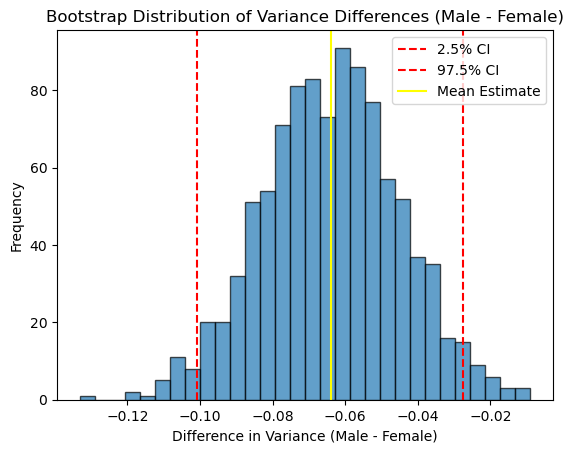

In [85]:
import matplotlib.pyplot as plt

# Visualize bootstrap 
plt.hist(bootstrap_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--', label='2.5% CI')
plt.axvline(ci_upper, color='red', linestyle='--', label='97.5% CI')
plt.axvline(mean_diff, color='yellow', linestyle='-', label='Mean Estimate')
plt.title("Bootstrap Distribution of Variance Differences (Male - Female)")
plt.xlabel("Difference in Variance (Male - Female)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [86]:
from scipy.stats import ks_2samp

# === KS Test for Distribution Differences ===
ks_stat, ks_p = ks_2samp(male_ratings, female_ratings)
print(f"\nKS Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

# Interpret KS test results
if ks_p < 0.0005:
    print("Reject H0: Distributions are significantly different.")
else:
    print("Fail to reject H0: No significant difference in distributions.")


KS Test: Statistic=0.0278, p-value=0.0041
Fail to reject H0: No significant difference in distributions.


### Q4. Is there a gender difference in the tags awarded by students? Make sure to teach each of the 20 tags for a potential gender difference and report which of them exhibit a statistically significant different. Comment on the 3 most gendered (lowest p-value) and least gendered (highest p-value) tags.

In [87]:
from scipy.stats import mannwhitneyu

# Hypotheses 
print("H0 (Null Hypothesis): There is no gender difference in the tag usage.")
print("H1 (Alternative Hypothesis): There is a gender difference in the tag usage.")

# Separate normalized tag data by gender
male_tags = filtered_df_tags_normalized[filtered_df_num["Male"] == 1]
female_tags = filtered_df_tags_normalized[filtered_df_num["Female"] == 1]

H0 (Null Hypothesis): There is no gender difference in the tag usage.
H1 (Alternative Hypothesis): There is a gender difference in the tag usage.


Use the Mann-Whitney U Test since it compares two independent groups without assuming normality.

In [88]:
# Perform Mann-Whitney U test for each tag
results = []
for tag in filtered_df_tags_normalized.columns:
    male_values = male_tags[tag].dropna()
    female_values = female_tags[tag].dropna()
    
    # Mann-Whitney U Test
    u_stat, p_val = mannwhitneyu(male_values, female_values, alternative='two-sided')
    results.append({"Tag": tag, "U-statistic": u_stat, "p-value": p_val})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by p-value
results_df.sort_values(by="p-value", inplace=True)

# Identify significant tags 
significant_tags = results_df[results_df["p-value"] < 0.0005]

In [89]:
# Identify the most and least gendered tags
most_gendered = results_df.head(3)
least_gendered = results_df.tail(3)

# Display results
#print(significant_tags)

print("\nMost Gendered Tags (Lowest p-values):")
print(most_gendered)

print("\nLeast Gendered Tags (Highest p-values):")
print(least_gendered)


Most Gendered Tags (Lowest p-values):
                 Tag  U-statistic        p-value
12         Hilarious   39131290.5  3.141429e-130
15  Amazing Lectures   35806501.0   1.110858e-33
16            Caring   29015686.0   6.374670e-31

Least Gendered Tags (Highest p-values):
             Tag  U-statistic   p-value
7  Inspirational   33250176.5  0.002365
9     Accessible   33086256.0  0.011779
8    Pop Quizzes   32501489.5  0.641514


Optional to see how many tags are statistically significant out of 20

In [90]:
# Count significant tags 
num_significant_tags = len(significant_tags)
total_tags = len(filtered_df_tags_normalized.columns)

print(f"\nOut of {total_tags} tags, {num_significant_tags} tag(s) showed a statistically significant gender difference.")


Out of 20 tags, 16 tag(s) showed a statistically significant gender difference.


### Q8. Build a regression model predicting average ratings from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2 and RMSE of this model. Which of these tags is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns. Also comment on how this model compares to the previous one.

Evaluate the Model:
- Compute  R^2  (coefficient of determination) to measure the model’s goodness-of-fit.
- Compute RMSE (Root Mean Square Error) to assess prediction accuracy.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# === Prepare Data ===
# Predictors: Normalized Tags
X = filtered_df_tags_normalized

# Target: Average Rating
y = filtered_df_num["Average Rating"]

# Handle missing values
X = X.fillna(0)
y = y.fillna(y.mean())

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17010868) 

In [116]:
# === Fit Regression Model ===
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2: 0.7339
RMSE: 0.4842


In [118]:
# === Analyze Coefficients ===
coefficients = pd.DataFrame({
    "Tag": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nRegression Coefficients:")
print(coefficients)




Regression Coefficients:
                      Tag  Coefficient
15       Amazing Lectures     1.199091
1           Good Feedback     1.018533
2               Respected     1.002837
11          Clear Grading     0.969712
16                 Caring     0.867515
12              Hilarious     0.772140
9              Accessible     0.584910
7           Inspirational     0.517525
17           Extra Credit     0.406457
4   Participation Matters     0.394699
5        Don’t Skip Class     0.251717
8             Pop Quizzes     0.075536
3            Lots to Read     0.056631
18         Group Projects    -0.126396
6        Lots of Homework    -0.161376
14   Graded by Few Things    -0.390492
19          Lecture Heavy    -0.429708
10         So Many Papers    -0.519917
13             Test Heavy    -0.541420
0            Tough Grader    -1.009853


Interpretation:
- VIF = 1, No collinearity
- VIF > 5, Moderate collinearity, worth to investigating
- VIF > 10, Severe collinearity

In [126]:
# === Address Multicollinearity: Calculate VIF ===
# Add a constant(intercept) for VIF calculation
X_with_const = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
vif_data = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "VIF": [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
})

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Highlight features with high VIF
high_vif = vif_data[vif_data["VIF"] > 5]
if not high_vif.empty:
    print("\nFeatures with High Multicollinearity (VIF > 5):")
    print(high_vif)



Variance Inflation Factors (VIF):
                  Feature        VIF
0               Intercept  28.549314
1            Tough Grader   1.654798
2           Good Feedback   1.313172
3               Respected   1.439228
4            Lots to Read   1.224156
5   Participation Matters   1.129465
6        Don’t Skip Class   1.179783
7        Lots of Homework   1.253289
8           Inspirational   1.391394
9             Pop Quizzes   1.052375
10             Accessible   1.086536
11         So Many Papers   1.102484
12          Clear Grading   1.200905
13              Hilarious   1.212977
14             Test Heavy   1.163934
15   Graded by Few Things   1.110317
16       Amazing Lectures   1.286716
17                 Caring   1.414295
18           Extra Credit   1.068303
19         Group Projects   1.068989
20          Lecture Heavy   1.275913

Features with High Multicollinearity (VIF > 5):
     Feature        VIF
0  Intercept  28.549314


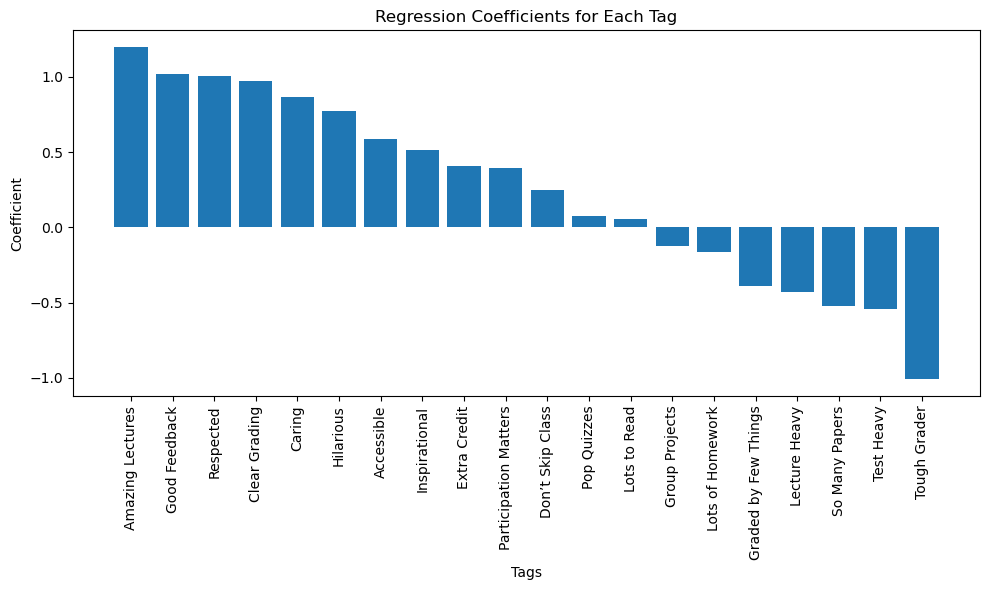

In [124]:
# === Visualize Coefficients ===
plt.figure(figsize=(10, 6))
plt.bar(coefficients["Tag"], coefficients["Coefficient"])
plt.xticks(rotation=90)
plt.title("Regression Coefficients for Each Tag")
plt.xlabel("Tags")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()